# Use of LSTM for short text classification

In [0]:
# install pickle
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [0]:
# mounting the drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
#importing the proper target dataset
dataset1=pd.read_csv("/content/drive/My Drive/MAJOR 2- WORK IN PROGRESS/dataset_25classes_less7000.csv")
dataset2=pd.read_csv("/content/drive/My Drive/MAJOR 2- WORK IN PROGRESS/dataset_17classes_more7000.csv")


In [0]:
# quick analysis of dataset1

#shape of the dataset
print(dataset1.shape)
print("========================================================")

#finding the columns in the dataset
print(dataset1.columns)
print("========================================================")

#all the unique classes
po=dataset1.category.unique()
for i in po:
    print(i)
print("========================================================")

#number of different classes in the dataset
print(len(po))
print("========================================================")

#value count for each of the class in the dataset
print(dataset1.category.value_counts())
print("========================================================")

#dropping the na isntances from the dataset, adn counting the value counts again
dataset1=dataset1.dropna()
print(dataset1.shape)
print("========================================================")
print(dataset1.category.value_counts())
print("========================================================")


(93384, 3)
Index(['Unnamed: 0', 'text_instance', 'category'], dtype='object')
CRIME
WORLD NEWS
IMPACT
WEIRD NEWS
WOMEN
MEDIA
TECH
RELIGION
SCIENCE
LATINO VOICES
EDUCATION
COLLEGE
ARTS & CULTURE
STYLE
GREEN
TASTE
GOOD NEWS
WORLDPOST
FIFTY
ARTS
DIVORCE
MONEY
ENVIRONMENT
CULTURE & ARTS
24
DIVORCE           6852
WOMEN             6592
IMPACT            6520
CRIME             6080
MEDIA             5088
WEIRD NEWS        4879
GREEN             4668
RELIGION          4413
WORLD NEWS        4352
TECH              4163
TASTE             4036
SCIENCE           3953
STYLE             3821
WORLDPOST         3820
MONEY             3413
ARTS & CULTURE    2678
ENVIRONMENT       2644
FIFTY             2443
GOOD NEWS         2437
ARTS              2372
LATINO VOICES     2150
COLLEGE           2065
CULTURE & ARTS    2049
EDUCATION         1896
Name: category, dtype: int64
(93384, 3)
DIVORCE           6852
WOMEN             6592
IMPACT            6520
CRIME             6080
MEDIA             5088
WEIRD 

In [0]:
#combining some of the similar classes into 1
print("combining some of the classes into 1....")
dataset1['category'].replace({"COLLEGE":"COLLEGE & EDUCATION","EDUCATION":"COLLEGE & EDUCATION",
                          "GREEN":"ENVIRONMENT","TECH":"TECH & SCIENCE","SCIENCE":"TECH & SCIENCE",
                          "CULTURE & ARTS":"ARTS & CULTURE","WEIRD NEWS":"NEWS","GOOD NEWS":"NEWS","WORLD NEWS":"NEWS","ARTS":"ARTS & CULTURE"}, inplace=True)

removed_classes=["LATINO VOICES","FIFTY"]
dataset1=dataset1[~dataset1['category'].isin(removed_classes)]
print("processing DONE.")


#value count of the new dataset formed
print(dataset1.category.value_counts())
print("========================================================")

#printing the head of the dataset
print(dataset1.head(5))
print("========================================================")


combining some of the classes into 1....
processing DONE.
NEWS                   11668
TECH & SCIENCE          8116
ENVIRONMENT             7312
ARTS & CULTURE          7099
DIVORCE                 6852
WOMEN                   6592
IMPACT                  6520
CRIME                   6080
MEDIA                   5088
RELIGION                4413
TASTE                   4036
COLLEGE & EDUCATION     3961
STYLE                   3821
WORLDPOST               3820
MONEY                   3413
Name: category, dtype: int64
   Unnamed: 0                                      text_instance category
0           0  There Were 2 Mass Shootings In Texas Last Week...    CRIME
1           1  She left her husband. He killed their children...    CRIME
2          22  South Korean President Meets North Korea's Kim...     NEWS
3          23  The two met to pave the way for a summit betwe...     NEWS
4          24  With Its Way Of Life At Risk, This Remote Oyst...   IMPACT


In [0]:
# adding a new column in the dataset for holding the factorised value of the classes
import numpy as np
dataset1['factor_class'] = np.nan

In [0]:
# factorising the caterogy column of the dataset .i.e, converting classes into numbers using hard code

print("creating a dictionary for mapping each class to a unique number")
classes=dataset1.category.unique()
count =1
dict_classes= {}
for i in classes:
    dict_classes[i]=count
    count+=1

print("final value of count ", count)
print("========================================================")



creating a dictionary for mapping each class to a unique number
final value of count  16
making the appropriate changes in the dataset using the dictionary created


In [0]:
print(dict_classes)

{'CRIME': 1, 'NEWS': 2, 'IMPACT': 3, 'WOMEN': 4, 'MEDIA': 5, 'TECH & SCIENCE': 6, 'RELIGION': 7, 'COLLEGE & EDUCATION': 8, 'ARTS & CULTURE': 9, 'STYLE': 10, 'ENVIRONMENT': 11, 'TASTE': 12, 'WORLDPOST': 13, 'DIVORCE': 14, 'MONEY': 15}


In [0]:
print("making the appropriate changes in the dataset using the dictionary created")
print("========================================================")

for i in range(0,len(dataset1)):
    dataset1.iloc[i,3]=int(dict_classes[dataset1.iloc[i,2]])

In [0]:
dataset1.head(10)


,Unnamed: 0,text_instance,category,factor_class
0,0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,1.0
1,1,She left her husband. He killed their children...,CRIME,1.0
2,22,South Korean President Meets North Korea's Kim...,NEWS,2.0
3,23,The two met to pave the way for a summit betwe...,NEWS,2.0
4,24,"With Its Way Of Life At Risk, This Remote Oyst...",IMPACT,3.0
5,25,The revolution is coming to rural New Brunswick.,IMPACT,3.0
6,40,Weird Father's Day Gifts Your Dad Doesn't Know...,NEWS,2.0
7,41,Why buy a boring tie when you can give him tes...,NEWS,2.0
8,44,Mystery 'Wolf-Like' Animal Reportedly Shot In ...,NEWS,2.0
9,45,“We have no idea what this was until we get a ...,NEWS,2.0


In [0]:
print(type(dataset1.factor_class))

<class 'pandas.core.series.Series'>


dataset 1 finalised - importing it into another dataset saved at the same location

In [0]:
dataset1.to_csv("/content/drive/My Drive/MAJOR 2- WORK IN PROGRESS/LSTM/datset_lstm_15classes.csv")

similarly handling dataset 2

In [0]:

#shape of the dataset
print(dataset2.shape)
print("========================================================")

#finding the columns in the dataset
print(dataset2.columns)
print("========================================================")

#all the unique classes
po=dataset2.category.unique()
for i in po:
    print(i)
print("========================================================")

#number of different classes in the dataset
print(len(po))
print("========================================================")

#value count for each of the class in the dataset
print(dataset2.category.value_counts())
print("========================================================")

#dropping the na isntances from the dataset, adn counting the value counts again
dataset1=dataset2.dropna()
print(dataset2.shape)
print("========================================================")
print(dataset2.category.value_counts())
print("========================================================")


(300120, 3)
Index(['Unnamed: 0', 'text_instance', 'category'], dtype='object')
ENTERTAINMENT
POLITICS
BLACK VOICES
COMEDY
QUEER VOICES
SPORTS
BUSINESS
TRAVEL
PARENTS
HEALTHY LIVING
THE WORLDPOST
WELLNESS
PARENTING
HOME & LIVING
STYLE & BEAUTY
WEDDINGS
FOOD & DRINK
17
POLITICS          65478
WELLNESS          35654
ENTERTAINMENT     32116
TRAVEL            19774
STYLE & BEAUTY    19298
PARENTING         17354
HEALTHY LIVING    13388
QUEER VOICES      12628
FOOD & DRINK      12452
BUSINESS          11874
COMEDY            10350
SPORTS             9768
BLACK VOICES       9056
HOME & LIVING      8390
PARENTS            7910
THE WORLDPOST      7328
WEDDINGS           7302
Name: category, dtype: int64
(300120, 3)
POLITICS          65478
WELLNESS          35654
ENTERTAINMENT     32116
TRAVEL            19774
STYLE & BEAUTY    19298
PARENTING         17354
HEALTHY LIVING    13388
QUEER VOICES      12628
FOOD & DRINK      12452
BUSINESS          11874
COMEDY            10350
SPORTS             

In [0]:
print("combining some of the classes into 1....")
dataset2['category'].replace({"PARENTS":"PARENTING","COMEDY":"ENTERTAINMENT",
                          "QUEER VOICES":"VOICES","BLACK VOICES":"VOICES"}, inplace=True)

# removed_classes=["LATINO VOICES","FIFTY"]
# dataset1=dataset1[~dataset1['category'].isin(removed_classes)]
print("processing DONE.")


#value count of the new dataset formed
print(dataset2.category.value_counts())
print("========================================================")

#printing the head of the dataset
print(dataset2.head(5))
print("========================================================")

combining some of the classes into 1....
processing DONE.
POLITICS          65478
ENTERTAINMENT     42466
WELLNESS          35654
PARENTING         25264
VOICES            21684
TRAVEL            19774
STYLE & BEAUTY    19298
HEALTHY LIVING    13388
FOOD & DRINK      12452
BUSINESS          11874
SPORTS             9768
HOME & LIVING      8390
THE WORLDPOST      7328
WEDDINGS           7302
Name: category, dtype: int64
   Unnamed: 0                                      text_instance       category
0           2  Will Smith Joins Diplo And Nicky Jam For The 2...  ENTERTAINMENT
1           3                           Of course it has a song.  ENTERTAINMENT
2           4    Hugh Grant Marries For The First Time At Age 57  ENTERTAINMENT
3           5  The actor and his longtime girlfriend Anna Ebe...  ENTERTAINMENT
4           6  Jim Carrey Blasts 'Castrato' Adam Schiff And D...  ENTERTAINMENT


In [0]:
dataset2['factor_classes'] =np.nan

In [0]:
# factorising the caterogy column of the dataset .i.e, converting classes into numbers using hard code

print("creating a dictionary for mapping each class to a unique number")
classes=dataset2.category.unique()
count =1
dict_classes= {}
for i in classes:
    dict_classes[i]=count
    count+=1

print("final value of count ", count)
print("========================================================")



creating a dictionary for mapping each class to a unique number
final value of count  15


In [0]:
print(dict_classes)

{'ENTERTAINMENT': 1, 'POLITICS': 2, 'VOICES': 3, 'SPORTS': 4, 'BUSINESS': 5, 'TRAVEL': 6, 'PARENTING': 7, 'HEALTHY LIVING': 8, 'THE WORLDPOST': 9, 'WELLNESS': 10, 'HOME & LIVING': 11, 'STYLE & BEAUTY': 12, 'WEDDINGS': 13, 'FOOD & DRINK': 14}


In [0]:
print("making the appropriate changes in the dataset using the dictionary created")
print("========================================================")

for i in range(0,len(dataset2)):
    dataset2.iloc[i,3]=int(dict_classes[dataset2.iloc[i,2]])

making the appropriate changes in the dataset using the dictionary created


In [0]:
dataset2.columns

Index(['Unnamed: 0', 'text_instance', 'category', 'factor_classes'], dtype='object')

In [0]:
print(dataset2.head(10))
print(len(dataset2.category.unique()))

print(dataset2.iloc[1,:])

   Unnamed: 0  ... factor_classes
0           2  ...            1.0
1           3  ...            1.0
2           4  ...            1.0
3           5  ...            1.0
4           6  ...            1.0
5           7  ...            1.0
6           8  ...            1.0
7           9  ...            1.0
8          10  ...            1.0
9          11  ...            1.0

[10 rows x 4 columns]
14
Unnamed: 0                               3
text_instance     Of course it has a song.
category                     ENTERTAINMENT
factor_classes                           1
Name: 1, dtype: object


In [0]:
#importing the dataset to another file in the same location
dataset2.to_csv("/content/drive/My Drive/MAJOR 2- WORK IN PROGRESS/LSTM/developed_dataset_lstm_14classes_more7000.csv")

once the dataset is prepared, we can move fwd with the development of an LSTM model

# LSTM: long short term memory model

preprocessing the text instances to clean them a bit


*   Convert all text to lower case.

*   Remove symbols that are in BAD_SYMBOLS_RE from text.
*   Replace REPLACE_BY_SPACE_RE symbols by space in text.


*   Remove “x” in text.

*   Remove stop words.
*   Remove digits in text.


also we will be using dataset1 for this exercise

In [0]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords


In [0]:
# downloading the stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
df=dataset1
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['text_instance'] = df['text_instance'].apply(clean_text)
df['text_instance'] = df['text_instance'].str.replace('\d+', '')

lstm modelling

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [0]:

# Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
# Limit the data set to the top 5,0000 words.
# Set the max number of words in each complaint at 250.


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text_instance'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 91596 unique tokens.


In [0]:
# Truncate and pad the input sequences so that they are all in the same length for modeling.


X = tokenizer.texts_to_sequences(df['text_instance'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (288603, 250)


In [0]:
# Converting categorical labels to numbers.
# 


Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (288603, 17)


In [0]:
# Train test split.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(259742, 250) (259742, 17)
(28861, 250) (28861, 17)


In [0]:
# The first layer is the embedded layer that uses 100 length vectors to represent each word.
# SpatialDropout1D performs variational dropout in NLP models.
# The next layer is the LSTM layer with 100 memory units.
# The output layer must create 13 output values, one for each class.
# Activation function is softmax for multi-class classification.
# Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 233767 samples, validate on 25975 samples
Epoch 1/5
233767/233767 [==============================] - 1637s 7ms/step - loss: 1.4657 - accuracy: 0.5649 - val_loss: 1.1474 - val_accuracy: 0.6537
Epoch 2/5
233767/233767 [==============================] - 1592s 7ms/step - loss: 1.0347 - accuracy: 0.6848 - val_loss: 1.0909 - val_accuracy: 0.6684
Epoch 3/5
233767/233767 [==============================] - 1603s 7ms/step - loss: 0.8913 - accuracy: 0.7230 - val_loss: 1.1076 - val_accuracy: 0.6695
Epoch 4/5
233767/233767 [==============================] - 1638s 7ms/step - loss: 0.7899 - accuracy: 0.7520 - val_loss: 1.1377 - val_accuracy: 0.6639
Epoch 5/5
233767/233767 [==============================] - 1655s 7ms/step - loss: 0.7118 - accuracy: 0.7748 - val_loss: 1.1922 - val_accuracy: 0.6606


In [0]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

28861/28861 [==============================] - 49s 2ms/step
Test set
  Loss: 1.187
  Accuracy: 0.661


In [0]:
# dump the model for future use
import pickle

pickle.dump(model, open("/content/drive/My Drive/MAJOR 2- WORK IN PROGRESS/MODELS/model_LSTM_less7000_17classes.sav", 'wb'))


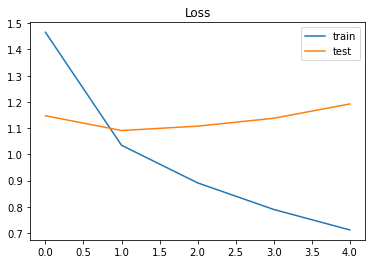

In [0]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

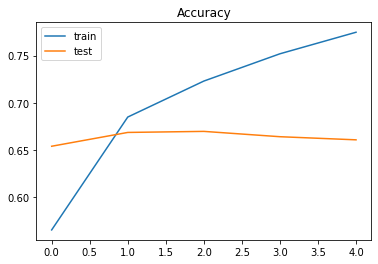

In [0]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();